In [1]:
import numpy as np
import pandas as pd

In [2]:
intercept = 4.540417
vulnerability = 3.571090
income = 2.470556
raceWhite = 0.288743
genderMale = 0.437807
odds = [vulnerability, income, raceWhite, genderMale]

In [8]:
def calculate_prob(char_list):
    val = 1
    for i,cval in enumerate(char_list):
        if cval != '0': val *= odds[i]
    return intercept*val/(1+ intercept*val)

In [9]:
char_combine = ['1111', '0111', '1011', '1101', '1110',
                '0011', '0101', '0110', '1001', '1010', '1100',
                '0001', '0010', '0100', '1000', '0000']
pre_cal_probs = [calculate_prob(cl) for cl in char_combine]

In [2]:
import matplotlib.pyplot as plt

<BarContainer object of 16 artists>

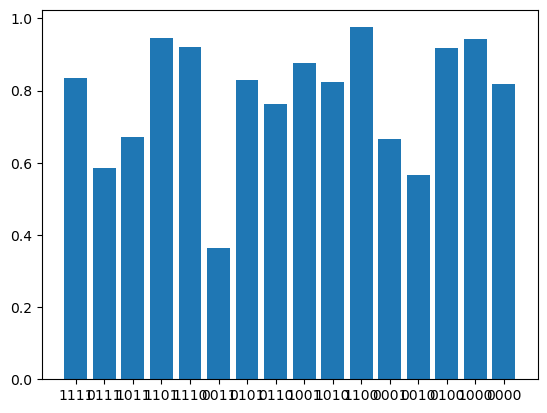

In [11]:
plt.bar(char_combine, pre_cal_probs)

In [46]:
raw_proportion_df = pd.read_csv('proportion_by_character.csv')
raw_proportion_df['GeoId'] = raw_proportion_df['GeoId'].apply(lambda x: '%012d'%x)
raw_proportion_df

,GeoId,aG,ag,AG,Ag,R,r,I,i
0,010010201001,0.243836,0.310959,0.157534,0.287671,0.792254,0.207746,0.242857,0.757143
1,010010201002,0.324624,0.325416,0.161520,0.188440,0.796384,0.203616,0.242857,0.757143
2,010010202001,0.319760,0.332934,0.150898,0.196407,0.386067,0.613933,0.164486,0.835514
3,010010202002,0.475979,0.201068,0.115658,0.207295,0.451054,0.548946,0.164486,0.835514
4,010010203001,0.349315,0.306056,0.163663,0.180966,0.668546,0.331454,0.200903,0.799097
...,...,...,...,...,...,...,...,...,...
291331,721537506011,0.323896,0.263873,0.219706,0.192525,0.844227,0.155773,0.078861,0.921139
291332,721537506012,0.262782,0.344431,0.137535,0.255252,0.571176,0.428824,0.078861,0.921139
291333,721537506013,0.412714,0.433905,0.068618,0.084763,0.817506,0.182494,0.078861,0.921139
291334,721537506021,0.273938,0.169309,0.230184,0.326569,0.613296,0.386704,0.013619,0.986381


In [47]:
icon_combine = ['AIRG', 'aIRG', 'AiRG', 'AIrG', 'AIRg',
                'aiRG', 'aIrG', 'aIRg', 'AirG', 'AiRg', 'AIrg',
                'airG', 'aiRg', 'aIrg', 'Airg', 'airg']

In [48]:
for ic in icon_combine:
    age_gender_flag = ic[0] + ic[-1]
    raw_proportion_df[ic] = raw_proportion_df[age_gender_flag] * raw_proportion_df[ic[1]] * raw_proportion_df[ic[2]]
raw_proportion_df

,GeoId,aG,ag,AG,Ag,R,r,I,i,AIRG,...,aIrG,aIRg,AirG,AiRg,AIrg,airG,aiRg,aIrg,Airg,airg
0,010010201001,0.243836,0.310959,0.157534,0.287671,0.792254,0.207746,0.242857,0.757143,0.030310,...,0.012302,0.059830,0.024779,0.172559,0.014514,0.038354,0.186528,0.015689,0.045249,0.048912
1,010010201002,0.324624,0.325416,0.161520,0.188440,0.796384,0.203616,0.242857,0.757143,0.031239,...,0.016053,0.062938,0.024901,0.113625,0.009318,0.050046,0.196218,0.016092,0.029051,0.050168
2,010010202001,0.319760,0.332934,0.150898,0.196407,0.386067,0.613933,0.164486,0.835514,0.009582,...,0.032291,0.021142,0.077403,0.063354,0.019834,0.164021,0.107393,0.033621,0.100747,0.170779
3,010010202002,0.475979,0.201068,0.115658,0.207295,0.451054,0.548946,0.164486,0.835514,0.008581,...,0.042978,0.014918,0.053047,0.078122,0.018718,0.218309,0.075775,0.018155,0.095076,0.092220
4,010010203001,0.349315,0.306056,0.163663,0.180966,0.668546,0.331454,0.200903,0.799097,0.021982,...,0.023261,0.041107,0.043348,0.096678,0.012051,0.092521,0.163505,0.020380,0.047931,0.081063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291331,721537506011,0.323896,0.263873,0.219706,0.192525,0.844227,0.155773,0.078861,0.921139,0.014627,...,0.003979,0.017568,0.031525,0.149717,0.002365,0.046475,0.205201,0.003242,0.027625,0.037863
291332,721537506012,0.262782,0.344431,0.137535,0.255252,0.571176,0.428824,0.078861,0.921139,0.006195,...,0.008887,0.015514,0.054327,0.134296,0.008632,0.103801,0.181217,0.011648,0.100826,0.136052
291333,721537506013,0.412714,0.433905,0.068618,0.084763,0.817506,0.182494,0.078861,0.921139,0.004424,...,0.005940,0.027974,0.011535,0.063830,0.001220,0.069378,0.326747,0.006245,0.014249,0.072940
291334,721537506021,0.273938,0.169309,0.230184,0.326569,0.613296,0.386704,0.013619,0.986381,0.001923,...,0.001443,0.001414,0.087801,0.197556,0.001720,0.104490,0.102422,0.000892,0.124566,0.064581


In [49]:
raw_proportion_df = raw_proportion_df[['GeoId'] + icon_combine].reset_index(drop=True)
raw_proportion_df

,GeoId,AIRG,aIRG,AiRG,AIrG,AIRg,aiRG,aIrG,aIRg,AirG,AiRg,AIrg,airG,aiRg,aIrg,Airg,airg
0,010010201001,0.030310,0.046915,0.094497,0.007948,0.055349,0.146265,0.012302,0.059830,0.024779,0.172559,0.014514,0.038354,0.186528,0.015689,0.045249,0.048912
1,010010201002,0.031239,0.062785,0.097393,0.007987,0.036446,0.195740,0.016053,0.062938,0.024901,0.113625,0.009318,0.050046,0.196218,0.016092,0.029051,0.050168
2,010010202001,0.009582,0.020306,0.048674,0.015238,0.012472,0.103143,0.032291,0.021142,0.077403,0.063354,0.019834,0.164021,0.107393,0.033621,0.100747,0.170779
3,010010202002,0.008581,0.035314,0.043587,0.010443,0.015380,0.179378,0.042978,0.014918,0.053047,0.078122,0.018718,0.218309,0.075775,0.018155,0.095076,0.092220
4,010010203001,0.021982,0.046917,0.087434,0.010898,0.024306,0.186616,0.023261,0.041107,0.043348,0.096678,0.012051,0.092521,0.163505,0.020380,0.047931,0.081063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291331,721537506011,0.014627,0.021564,0.170854,0.002699,0.012818,0.251878,0.003979,0.017568,0.031525,0.149717,0.002365,0.046475,0.205201,0.003242,0.027625,0.037863
291332,721537506012,0.006195,0.011837,0.072362,0.004651,0.011497,0.138258,0.008887,0.015514,0.054327,0.134296,0.008632,0.103801,0.181217,0.011648,0.100826,0.136052
291333,721537506013,0.004424,0.026607,0.051672,0.000988,0.005465,0.310789,0.005940,0.027974,0.011535,0.063830,0.001220,0.069378,0.326747,0.006245,0.014249,0.072940
291334,721537506021,0.001923,0.002288,0.139248,0.001212,0.002728,0.165717,0.001443,0.001414,0.087801,0.197556,0.001720,0.104490,0.102422,0.000892,0.124566,0.064581


In [50]:
raw_proportion_df.to_csv('proportion_in_each_combination.csv', index = False)

In [51]:
us_pop_df = pd.read_csv('../src_data/usa_population.csv', dtype={'GeoId': str})
us_pop_df

,GeoId,Population
0,010010201001,730
1,010010201002,1263
2,010010202001,835
3,010010202002,1124
4,010010203001,2774
...,...,...
220328,721537506011,883
220329,721537506012,2523
220330,721537506013,991
220331,721537506021,1577


In [52]:
us_pop_with_proportion_df = us_pop_df.join(raw_proportion_df.set_index('GeoId'), on = 'GeoId', how = 'left')
us_pop_with_proportion_df

,GeoId,Population,AIRG,aIRG,AiRG,AIrG,AIRg,aiRG,aIrG,aIRg,AirG,AiRg,AIrg,airG,aiRg,aIrg,Airg,airg
0,010010201001,730,0.030310,0.046915,0.094497,0.007948,0.055349,0.146265,0.012302,0.059830,0.024779,0.172559,0.014514,0.038354,0.186528,0.015689,0.045249,0.048912
1,010010201002,1263,0.031239,0.062785,0.097393,0.007987,0.036446,0.195740,0.016053,0.062938,0.024901,0.113625,0.009318,0.050046,0.196218,0.016092,0.029051,0.050168
2,010010202001,835,0.009582,0.020306,0.048674,0.015238,0.012472,0.103143,0.032291,0.021142,0.077403,0.063354,0.019834,0.164021,0.107393,0.033621,0.100747,0.170779
3,010010202002,1124,0.008581,0.035314,0.043587,0.010443,0.015380,0.179378,0.042978,0.014918,0.053047,0.078122,0.018718,0.218309,0.075775,0.018155,0.095076,0.092220
4,010010203001,2774,0.021982,0.046917,0.087434,0.010898,0.024306,0.186616,0.023261,0.041107,0.043348,0.096678,0.012051,0.092521,0.163505,0.020380,0.047931,0.081063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,883,0.014627,0.021564,0.170854,0.002699,0.012818,0.251878,0.003979,0.017568,0.031525,0.149717,0.002365,0.046475,0.205201,0.003242,0.027625,0.037863
220329,721537506012,2523,0.006195,0.011837,0.072362,0.004651,0.011497,0.138258,0.008887,0.015514,0.054327,0.134296,0.008632,0.103801,0.181217,0.011648,0.100826,0.136052
220330,721537506013,991,0.004424,0.026607,0.051672,0.000988,0.005465,0.310789,0.005940,0.027974,0.011535,0.063830,0.001220,0.069378,0.326747,0.006245,0.014249,0.072940
220331,721537506021,1577,0.001923,0.002288,0.139248,0.001212,0.002728,0.165717,0.001443,0.001414,0.087801,0.197556,0.001720,0.104490,0.102422,0.000892,0.124566,0.064581


In [58]:
us_pop_with_proportion_df['GeoId_county'] = us_pop_with_proportion_df['GeoId'].apply(lambda x: x[:5])
us_pop_with_proportion_df['County_Population'] = 0
grouped_county_pop = us_pop_with_proportion_df.groupby('GeoId_county')
for _,group in grouped_county_pop:
    us_pop_with_proportion_df.loc[group.index, 'County_Population'] = group['Population'].sum()
us_pop_with_proportion_df

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')
Index([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,
        46,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,
        74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125],
      dtype='int64')
Index([126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 146, 147, 148],
      dtype='int64')
Index([149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163],
      dtype='int64')
Index([164, 165, 166, 167, 168, 1

,GeoId,Population,AIRG,aIRG,AiRG,AIrG,AIRg,aiRG,aIrG,aIRg,AirG,AiRg,AIrg,airG,aiRg,aIrg,Airg,airg,GeoId_county,County_Population
0,010010201001,730,0.030310,0.046915,0.094497,0.007948,0.055349,0.146265,0.012302,0.059830,0.024779,0.172559,0.014514,0.038354,0.186528,0.015689,0.045249,0.048912,01001,55380
1,010010201002,1263,0.031239,0.062785,0.097393,0.007987,0.036446,0.195740,0.016053,0.062938,0.024901,0.113625,0.009318,0.050046,0.196218,0.016092,0.029051,0.050168,01001,55380
2,010010202001,835,0.009582,0.020306,0.048674,0.015238,0.012472,0.103143,0.032291,0.021142,0.077403,0.063354,0.019834,0.164021,0.107393,0.033621,0.100747,0.170779,01001,55380
3,010010202002,1124,0.008581,0.035314,0.043587,0.010443,0.015380,0.179378,0.042978,0.014918,0.053047,0.078122,0.018718,0.218309,0.075775,0.018155,0.095076,0.092220,01001,55380
4,010010203001,2774,0.021982,0.046917,0.087434,0.010898,0.024306,0.186616,0.023261,0.041107,0.043348,0.096678,0.012051,0.092521,0.163505,0.020380,0.047931,0.081063,01001,55380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,883,0.014627,0.021564,0.170854,0.002699,0.012818,0.251878,0.003979,0.017568,0.031525,0.149717,0.002365,0.046475,0.205201,0.003242,0.027625,0.037863,72153,35428
220329,721537506012,2523,0.006195,0.011837,0.072362,0.004651,0.011497,0.138258,0.008887,0.015514,0.054327,0.134296,0.008632,0.103801,0.181217,0.011648,0.100826,0.136052,72153,35428
220330,721537506013,991,0.004424,0.026607,0.051672,0.000988,0.005465,0.310789,0.005940,0.027974,0.011535,0.063830,0.001220,0.069378,0.326747,0.006245,0.014249,0.072940,72153,35428
220331,721537506021,1577,0.001923,0.002288,0.139248,0.001212,0.002728,0.165717,0.001443,0.001414,0.087801,0.197556,0.001720,0.104490,0.102422,0.000892,0.124566,0.064581,72153,35428


In [59]:
us_pop_with_proportion_df['pre_cal_prob'] = 0
for i,ic in enumerate(icon_combine):
    us_pop_with_proportion_df['pre_cal_prob'] += us_pop_with_proportion_df[ic] * pre_cal_probs[i]
us_pop_with_proportion_df

,GeoId,Population,AIRG,aIRG,AiRG,AIrG,AIRg,aiRG,aIrG,aIRg,...,AiRg,AIrg,airG,aiRg,aIrg,Airg,airg,GeoId_county,County_Population,pre_cal_prob
0,010010201001,730,0.030310,0.046915,0.094497,0.007948,0.055349,0.146265,0.012302,0.059830,...,0.172559,0.014514,0.038354,0.186528,0.015689,0.045249,0.048912,01001,55380,0.690583
1,010010201002,1263,0.031239,0.062785,0.097393,0.007987,0.036446,0.195740,0.016053,0.062938,...,0.113625,0.009318,0.050046,0.196218,0.016092,0.029051,0.050168,01001,55380,0.654677
2,010010202001,835,0.009582,0.020306,0.048674,0.015238,0.012472,0.103143,0.032291,0.021142,...,0.063354,0.019834,0.164021,0.107393,0.033621,0.100747,0.170779,01001,55380,0.734280
3,010010202002,1124,0.008581,0.035314,0.043587,0.010443,0.015380,0.179378,0.042978,0.014918,...,0.078122,0.018718,0.218309,0.075775,0.018155,0.095076,0.092220,01001,55380,0.692881
4,010010203001,2774,0.021982,0.046917,0.087434,0.010898,0.024306,0.186616,0.023261,0.041107,...,0.096678,0.012051,0.092521,0.163505,0.020380,0.047931,0.081063,01001,55380,0.670122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220328,721537506011,883,0.014627,0.021564,0.170854,0.002699,0.012818,0.251878,0.003979,0.017568,...,0.149717,0.002365,0.046475,0.205201,0.003242,0.027625,0.037863,72153,35428,0.623284
220329,721537506012,2523,0.006195,0.011837,0.072362,0.004651,0.011497,0.138258,0.008887,0.015514,...,0.134296,0.008632,0.103801,0.181217,0.011648,0.100826,0.136052,72153,35428,0.701109
220330,721537506013,991,0.004424,0.026607,0.051672,0.000988,0.005465,0.310789,0.005940,0.027974,...,0.063830,0.001220,0.069378,0.326747,0.006245,0.014249,0.072940,72153,35428,0.573977
220331,721537506021,1577,0.001923,0.002288,0.139248,0.001212,0.002728,0.165717,0.001443,0.001414,...,0.197556,0.001720,0.104490,0.102422,0.000892,0.124566,0.064581,72153,35428,0.703021


In [60]:
us_cbg_precal_prob_df = us_pop_with_proportion_df[['GeoId', 'Population','pre_cal_prob']].reset_index(drop = True)
us_cbg_precal_prob_df.to_csv('us_cbg_reporting_probs.csv', index = False)

In [62]:
us_county_precal_prob_df = us_pop_with_proportion_df[['GeoId','Population', 'GeoId_county', 'County_Population','pre_cal_prob']].reset_index(drop = True)
us_county_precal_prob_df['proportion'] = us_county_precal_prob_df['Population']/us_county_precal_prob_df['County_Population']
us_county_precal_prob_df['pre_cal_prob'] = us_county_precal_prob_df['pre_cal_prob'] * us_county_precal_prob_df['proportion']
grouped_county_pop = us_county_precal_prob_df.groupby('GeoId_county')
for _,group in grouped_county_pop:
    us_county_precal_prob_df.loc[group.index, 'pre_cal_prob'] = group['pre_cal_prob'].sum()
us_county_precal_prob_df

,GeoId,Population,GeoId_county,County_Population,pre_cal_prob,proportion
0,010010201001,730,01001,55380,0.714892,0.013182
1,010010201002,1263,01001,55380,0.714892,0.022806
2,010010202001,835,01001,55380,0.714892,0.015078
3,010010202002,1124,01001,55380,0.714892,0.020296
4,010010203001,2774,01001,55380,0.714892,0.050090
...,...,...,...,...,...,...
220328,721537506011,883,72153,35428,0.661084,0.024924
220329,721537506012,2523,72153,35428,0.661084,0.071215
220330,721537506013,991,72153,35428,0.661084,0.027972
220331,721537506021,1577,72153,35428,0.661084,0.044513


In [64]:
us_county_precal_prob_df = us_county_precal_prob_df[['GeoId_county', 'County_Population', 'pre_cal_prob']].reset_index(drop = True)
us_county_precal_prob_df = us_county_precal_prob_df.drop_duplicates().reset_index(drop = True)
us_county_precal_prob_df

,GeoId_county,County_Population,pre_cal_prob
0,01001,55380,0.714892
1,01003,212830,0.719300
2,01005,25361,0.717847
3,01007,22493,0.736306
4,01009,57681,0.733030
...,...,...,...
3215,72145,52192,0.758802
3216,72147,8642,0.779337
3217,72149,22403,0.730787
3218,72151,33499,0.792920


In [82]:
us_county_precal_prob_df = us_county_precal_prob_df[us_county_precal_prob_df['Population'] > 1000]

In [65]:
us_county_precal_prob_df = us_county_precal_prob_df.rename(columns={'County_Population': 'Population', 'GeoId_county':'GeoId'})
us_county_precal_prob_df.to_csv('us_county_reporting_probs.csv', index = False)

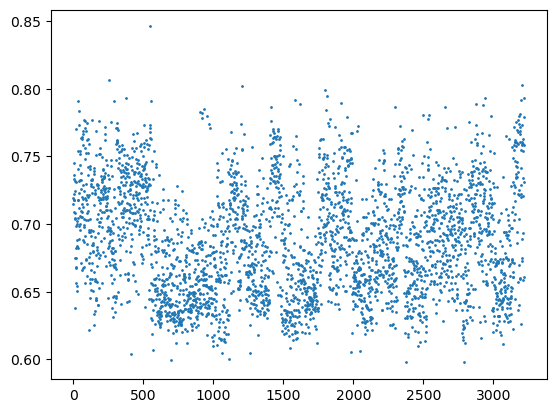

In [68]:
plt.scatter(np.arange(0, len(us_county_precal_prob_df)), us_county_precal_prob_df['pre_cal_prob'], s=1)

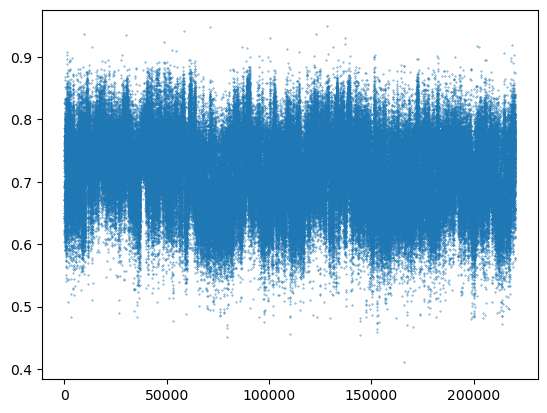

In [69]:
plt.scatter(np.arange(0, len(us_cbg_precal_prob_df)), us_cbg_precal_prob_df['pre_cal_prob'], s=0.1)

In [3]:
import geopandas as gpd

In [4]:
us_county_precal_prob_df = pd.read_csv('us_county_reporting_probs.csv', dtype={'GeoId': str})

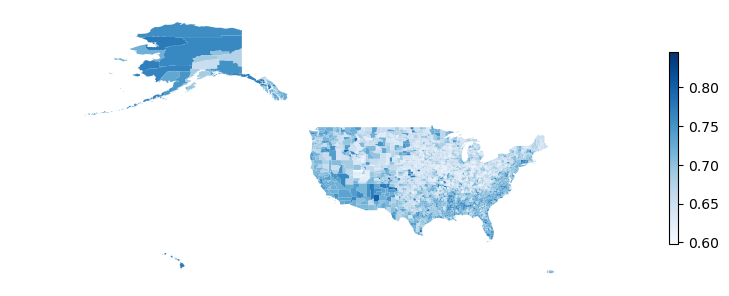

In [85]:
map_df = gpd.read_file('../src_data/us_county/us_county.shp')
fig, ax = plt.subplots(figsize = (10,5))
prob_map_df = map_df.merge(us_county_precal_prob_df, left_on='GEOID', right_on='GeoId', how = 'left')
prob_map_df.plot(column='pre_cal_prob', cmap='Blues', ax = ax, linewidth = 0.1, legend=True ,legend_kwds={'shrink': 0.5})
xlim = ax.get_xlim()
new_xlim = [xlim[0],  xlim[0]+150]
ax.set_xlim(new_xlim)
ax.axis('off')
plt.savefig('county_probability.pdf',format = 'pdf', dpi = 300)

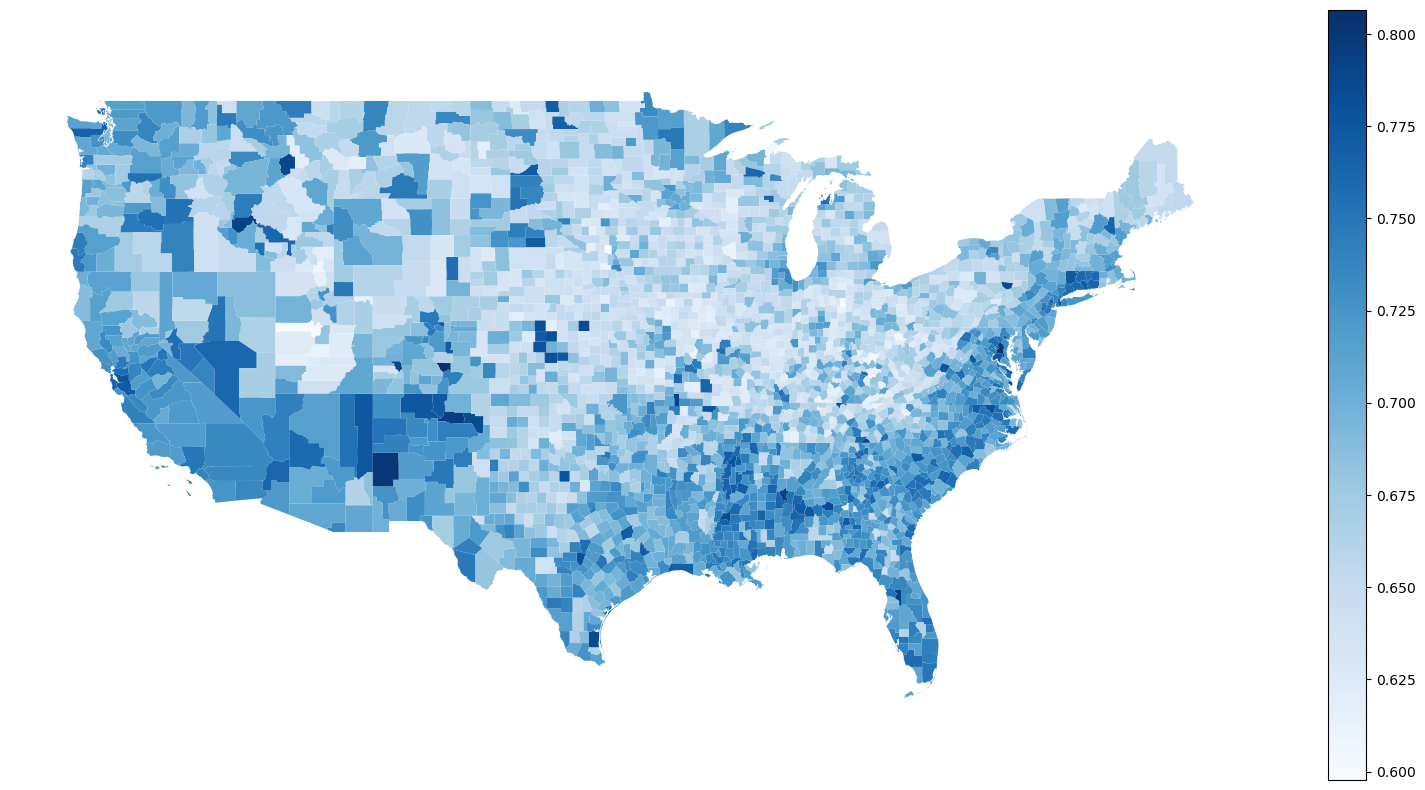

In [13]:
map_df = gpd.read_file('../src_data/us_county_mainland/us_county.shp')
fig, ax = plt.subplots(figsize = (20,20))
prob_map_df = map_df.merge(us_county_precal_prob_df, left_on='GEOID', right_on='GeoId', how = 'left')
prob_map_df.plot(column='pre_cal_prob', cmap='Blues', ax = ax, linewidth = 0.1, legend=True ,legend_kwds={'shrink': 0.5})
ax.axis('off')
plt.savefig('mainland_county_probability.pdf',format = 'pdf', dpi = 300)